In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [8]:
#Loading data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

In [9]:
#Exploring the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
print('Only {:.0f}% of passengers have survived'.format(train["Survived"].value_counts(True)[1]*100))

Only 38% of passengers have survived


In [31]:
train_copy = train.copy()
test_copy = test.copy()

In [34]:
def corr(x):
    corr_matrix = x.corr()
    c           = corr_matrix["Survived"].sort_values(ascending = False)
    print(c)
corr(train_copy)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [35]:
print('{:.2f} of Parch values are 0'.format(train.Parch.value_counts(1)[0]*100))

76.09 of Parch values are 0


In [37]:
print('{:.2f} of SibSp values are 0'.format(train.SibSp.value_counts(1)[0]*100))

68.24 of SibSp values are 0


In [41]:
print('{:.0f}% of Cabin attribute in values are missing in training data'.format(train["Cabin"].isnull().value_counts(1)[1]*100))

77% of Cabin attribute in values are missing in training data


In [44]:
print('{:.0f}% of cabin attribute in values are missing in test data'.format(test['Cabin'].isnull().value_counts(1)[1]*100))

78% of cabin attribute in values are missing in test data


In [45]:
train_copy['deck'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_copy['Cabin']])

In [47]:
test_copy['deck'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test_copy['Cabin']])

In [50]:
train_copy.groupby(by=['deck','Pclass'])['deck'].count()

deck  Pclass
A     1          15
B     1          47
C     1          59
D     1          29
      2           4
E     1          25
      2           4
      3           3
F     2           8
      3           5
G     3           4
T     1           1
X     1          40
      2         168
      3         479
Name: deck, dtype: int64

In [51]:
test_copy.groupby(by=['deck','Pclass'])['deck'].count()

deck  Pclass
A     1           7
B     1          18
C     1          35
D     1          11
      2           2
E     1           9
F     2           5
      3           3
G     3           1
X     1          27
      2          86
      3         214
Name: deck, dtype: int64

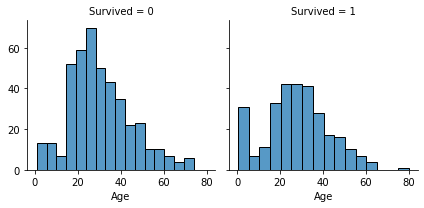

In [56]:
g = sns.FacetGrid(train, col='Survived')

g = g.map(sns.histplot, "Age")

In [59]:
f= test.Fare.isnull().value_counts()[1]
e= train.Embarked.isnull().value_counts()[1]
print('Only {0} value of Fare attribute is missing in test and only {1} values of Embarked attribute are missing in train'.format(f,e))

Only 1 value of Fare attribute is missing in test and only 2 values of Embarked attribute are missing in train


In [60]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


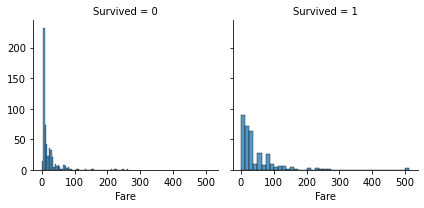

In [61]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.histplot,'Fare')

In [64]:
print('There is {0} unique values of Ticket attribute'.format(len(train.Ticket.unique())))

There is 681 unique values of Ticket attribute


In [67]:
train_copy['Title'] = train_copy['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train_copy.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Jonkheer          1
Lady              1
Sir               1
Don               1
Mme               1
the Countess      1
Capt              1
Name: Title, dtype: int64

In [68]:
class Imputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.med_fare_ = X.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
        self.most_freq_embarked = X.Embarked.value_counts().index[0]
        return self
    def transform(self, X, y=None):
        #replacing missing values of Age with median Age for each class. 1 value for each Sex.
        X.Age = X.groupby(['Sex', 'Pclass'])['Age'].apply(lambda z: z.fillna(z.median()))
        # 1 only missing value for Fare. A Man in the third class with no family
        X.Fare = X.Fare.fillna(self.med_fare_)
        # filling Embarked with the most frequent 
        X.Embarked = X.Embarked.fillna(self.most_freq_embarked)
        
        return X

In [69]:
class feature_engineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # combining Sibsp and Parch to create relative on board then creating the family attribute
        X["RelativesOnboard"] = X["SibSp"] + X["Parch"]
        X['Family'] = X['RelativesOnboard'].map({0: 'Alone', 1: 'Small', 2: 'Small', 3: 'Medium', 4: 'Medium', 5: 'Medium', 6: 'Large', 7: 'Large', 10: 'Large'})
        # extracting the first letter of each cabin to create deck attribute
        X["Deck"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in X['Cabin'] ])  
        # regrouping deck catergories
        X['Deck'] = X['Deck'].replace(['T', 'A', 'B', 'C'], 'ABC')
        X['Deck'] = X['Deck'].replace(['D', 'E'], 'DE')
        X['Deck'] = X['Deck'].replace(['F', 'G'], 'FG')
        # we will transform the Age from continuous data into and attribute with 14 category.
        X["Age"] = pd.cut(X["Age"],
                               bins=[0., 5.0, 15.0, 25.0, 30.0, 40.0,50.0,60.0, np.inf],
                               labels=[1, 2, 3, 4, 5,6,7,8])
        # For Fare, Applying will reduce skewness distribution
        X["Fare"] = X["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
        # Replace ticket ID by ticket frequency
        X['Ticket_Frequency'] = X.groupby('Ticket')['Ticket'].transform('count')
        # Extract title attribute from Name and create IsMarried Attribute
        X['Title'] = X['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
        X['Is_Married'] = 0
        X['Is_Married'].loc[X['Title'] == 'Mrs'] = 1
        X['Title'] = X['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
        X['Title'] = X['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')
        return X

In [70]:
class encoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ohe = OneHotEncoder()
        self.le = LabelEncoder()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        #label encoding
        for i in ['Age', 'Fare', 'Embarked', 'Sex', 'Title', 'Family', 'Title', 'RelativesOnboard', 'Deck']:
            X[i] = self.le.fit_transform(X[i])
        #OneHotEncoding
        encoded_features = []
        for cat in ['Deck', 'Age','Pclass', 'Sex', 'Title','Embarked','Family','RelativesOnboard']:
            encoded_feat = self.ohe.fit_transform(X[cat].values.reshape(-1, 1)).toarray()
            n = X[cat].nunique()
            cols = ['{}_{}'.format(cat, n) for n in range(1, n + 1)]
            encoded_df = pd.DataFrame(encoded_feat, columns=cols)
            encoded_df.index = X.index
            encoded_features.append(encoded_df)
        X = pd.concat([X, *encoded_features[:8]], axis=1)
        return X

In [71]:
class Columns_drop(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.attribute_names, axis=1)

In [74]:
dropped_columns = [ 'RelativesOnboard','Age', 'Sex','Deck', 'Family', 'Embarked', 'PassengerId', 'Pclass', 'Name', 'Ticket','Cabin','Embarked']

In [75]:
processing_pipeline = Pipeline([
    ('Filling missing values', Imputer()),
    ('Feature Engineering', feature_engineering()),
    ('Encoding', encoding()),
    ('dropping useless columns', Columns_drop(dropped_columns) ),
    
])

In [76]:
X_train= train.copy()
X_test = test.copy()
X_train = processing_pipeline.fit_transform(X_train)
corr(X_train)
X_train = X_train.drop('Survived',axis=1 )
y_train = train['Survived']
X_test = processing_pipeline.fit_transform(test)

Survived              1.000000
Sex_1                 0.543351
Title_3               0.540769
Is_Married            0.339040
Fare                  0.333943
Pclass_1              0.285904
Family_4              0.238059
Deck_2                0.213430
Deck_1                0.202551
Embarked_1            0.168240
RelativesOnboard_2    0.163157
Age_1                 0.150304
RelativesOnboard_3    0.143869
RelativesOnboard_4    0.128347
Pclass_2              0.093349
Title_2               0.085221
Parch                 0.081629
Age_5                 0.068219
Deck_3                0.058617
Ticket_Frequency      0.038247
Age_2                 0.034183
Family_3              0.014687
Age_7                 0.009569
Embarked_2            0.003650
Age_4                 0.002193
Age_6                -0.000079
RelativesOnboard_7   -0.012134
Title_1              -0.031348
SibSp                -0.035322
RelativesOnboard_5   -0.049466
Age_8                -0.051224
RelativesOnboard_8   -0.064988
Relative

/home/sultan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/sultan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
